In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

e:\Users\DANICA\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
house = pd.read_csv('C:/Users/DANICA/Documents/Projects/dataset/Housing.csv')

In [3]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Data Analysis

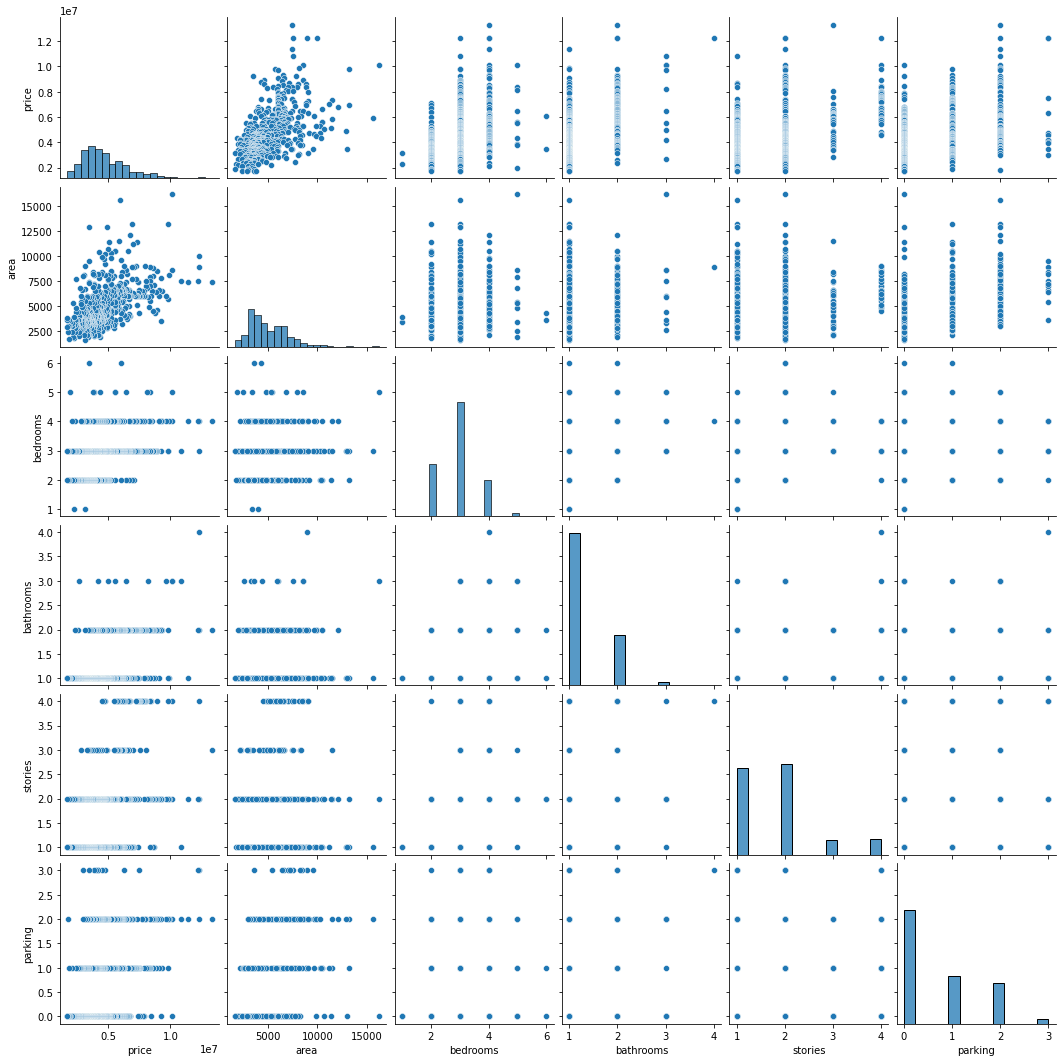

In [7]:
sns.pairplot(house)

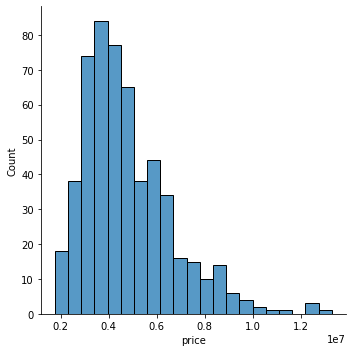

In [8]:
sns.displot(house['price'])

<AxesSubplot:>

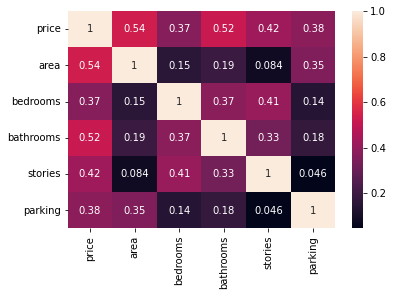

In [9]:
sns.heatmap(house.corr(), annot =True)

TRAINING LINEAR REGRESSION MODEL

In [10]:
x = house[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y = house['price']

SPLIT DATA INTO TWO TRAIN AND TEST

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'x' is your feature dataset and 'y' is your target variable
le = LabelEncoder()

# Encode categorical columns in 'x'
categorical_columns = ['hotwaterheating', 'airconditioning', 'guestroom', 'mainroad', 'basement', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    if column == 'furnishingstatus':
        x[column] = le.fit_transform(x[column].map({'semi furnished': 0, 'furnished': 1}))
    else:
        x[column] = le.fit_transform(x[column].map({'yes': 1, 'no': 0}))


C:\Users\DANICA\AppData\Local\Temp\ipykernel_17616\1637517339.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = le.fit_transform(x[column].map({'yes': 1, 'no': 0}))
C:\Users\DANICA\AppData\Local\Temp\ipykernel_17616\1637517339.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = le.fit_transform(x[column].map({'yes': 1, 'no': 0}))
C:\Users\DANICA\AppData\Local\Temp\ipykernel_17616\1637517339.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state=100)

CREATE AND TRAIN LINEAR REGRESSION MODEL

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train) 
house['mainroad'] = encoder.fit_transform(house['mainroad'])
house['guestroom'] = encoder.fit_transform(house['guestroom'])
house['basement'] = encoder.fit_transform(house['basement'])
house['hotwaterheating'] = encoder.fit_transform(house['hotwaterheating'])
house['airconditioning'] = encoder.fit_transform(house['airconditioning'])
house['prefarea'] = encoder.fit_transform(house['prefarea'])
house['furnishingstatus'] = house['furnishingstatus'].map({'semi-furnished': 0, 'furnished': 1})

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean value
X_train_imputed = imputer.fit_transform(house[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']])
y_train_imputed = imputer.fit_transform(house[['price']])

In [18]:
lm.fit(X_train_imputed, y_train_imputed)

LinearRegression()

EVALUATION 

In [19]:
print(lm.intercept_)

[-290833.5756987]


In [20]:
coefficients = lm.coef_.reshape(1, -1)
print(coefficients.shape)
print(len(x_train))

if isinstance(x_train, pd.DataFrame):
    column_names = x_train.columns.tolist()
else:
    column_names = x_train

coeff_house = pd.DataFrame(coefficients, columns=column_names)
coeff_house.index = ['Coefficient']
coeff_house

(1, 12)
272


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
Coefficient,247.962238,128754.154538,1.005370e+06,456793.479403,464986.858935,316161.026903,382053.997254,899239.946542,877652.323935,298114.308849,656664.367801,31664.931598


PREDICTIONS

In [21]:
predictions = lm.predict(x_test)

e:\Users\DANICA\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


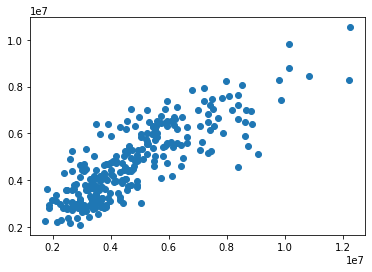

In [22]:
plt.scatter(y_test,predictions)

e:\Users\DANICA\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

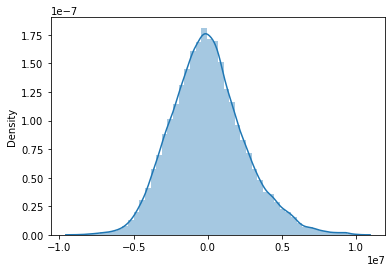

In [23]:
diff = y_test.values - predictions
sns.distplot(diff, bins=50)

<AxesSubplot:ylabel='Count'>

e:\Users\DANICA\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


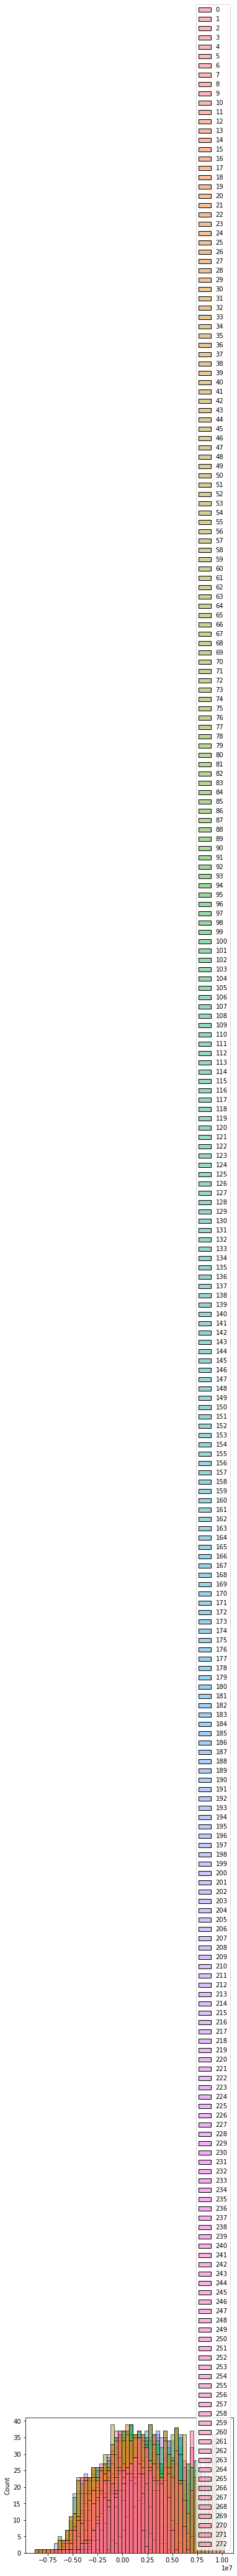

In [24]:
diff = y_test.values - predictions
sns.histplot(diff, bins=50)

REGRESSION EVALUATION METRICS

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 807099.7136702582
MSE: 1167026927606.6313
RMSE: 1080290.2052720054
